# Linear regression with TensorFlow 

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-13-02

Here, I present a simple and easy way to create a linear regression with TensorFlow. In this case the data is created by linear equation y=w1*x+w2*z+b. No external files is needed.

# The Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# The data 

In [10]:
#Data is generated by a linear equation y=w1*x+w2*z+b

#number of observation
Nobservation=850
#weights of linear model
w1=4
w2=5
#bias of linear model
b=3
#definition of varibales x and z
x = np.random.uniform(-8, 8, (Nobservation,1))
z = np.random.uniform(-8, 8, (Nobservation,1))
#combine imputs
Inputs = np.column_stack((x,z))
#we need some deviation or noise
dev = np.random.uniform(-1, 1, (Nobservation,1))

#The lienar model (Outputs)

Targets=w1*x+w2*z+b+dev

#export the data
np.savez('TF_data', inputs=Inputs, targets=Targets)




# TensorFlow model

In [26]:
#size of the variables
size_input = 2
size_output = 1

#define inputs and targets
TF_inputs = tf.placeholder(tf.float32, [None, size_input])
TF_targets = tf.placeholder(tf.float32, [None, size_output])

#initialization of weights and bias
TF_w = tf.Variable(tf.random_uniform([size_input, size_output], minval=-0.1, maxval=0.1))
TF_b = tf.Variable(tf.random_uniform([size_output], minval=-0.1, maxval=0.1))

#set the outputs
TF_outputs = tf.matmul(TF_inputs, TF_w) + TF_b

#loss function
TF_lf = tf.losses.mean_squared_error(labels=TF_targets, predictions=TF_outputs)

#Gadient Descent
TF_GD = tf.train.GradientDescentOptimizer(learning_rate=0.02).minimize(TF_lf)

#Prepare execution

TF_sess = tf.InteractiveSession()
TF_ini = tf.global_variables_initializer()
TF_sess.run(TF_ini)

#load the data
Train_data = np.load('TF_data.npz')


#training

for n  in range(100):
    _, curr_loss = TF_sess.run([TF_GD, TF_lf], 
        feed_dict={TF_inputs: Train_data['inputs'], TF_targets: Train_data['targets']})

print(curr_loss)

0.34263685


# Plot results

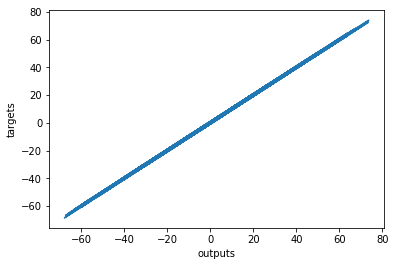

In [31]:
#test results
TF_Results = TF_sess.run([TF_outputs], 
               feed_dict={TF_inputs: Train_data['inputs']})
#create the plot
plt.plot(np.squeeze(TF_Results), np.squeeze(Train_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
        
